# Exploration of PA Vaccination Data

In [2]:
import pandas
import pandas as pd

vac_race_zip_csv = "http://data.wprdc.org/datastore/dump/d3f5c6a6-c5f8-48db-8da2-f22a39bc8ef8"
local_csv = 'vaccine-sep29.csv'

def n2z(x) -> float:
    return float(0) if not x else float(x)

# converts null to 0 on the data fields
converters = {k: n2z for k in range(2, 16)}

df = pandas.read_csv(
    local_csv,
    parse_dates=['date_saved'],
    converters=converters,
    usecols=lambda c: c not in ['latitude', 'longitude', 'date_updated'],
    dtype={'patient_zip_code': str}
)
df.head()

,patient_zip_code,partially_covered_african_american,partially_covered_asian,partially_covered_native_american,partially_covered_pacific_islander,partially_covered_multiple_other,partially_covered_white,partially_covered_unknown,fully_covered_african_american,fully_covered_asian,fully_covered_native_american,fully_covered_pacific_islander,fully_covered_multiple_other,fully_covered_white,fully_covered_unknown,date_saved
0,17142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-27
1,15000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-27
2,19424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2021-07-27
3,15448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,2021-07-27
4,15426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-27


In [3]:
# Get zip_code demographic data and prepare to merge with vaccine data
demog_data_file = 'https://raw.githubusercontent.com/WPRDC/bec-vaccination-map/main/zip_code_pop_2019.csv'

source_demog_df = pd.read_csv(demog_data_file, dtype={'zip code tabulation area': str})

total_pop = source_demog_df['B01001_001E']
black_pop = source_demog_df['B01001B_001E']

# < 10 years populations
total_kid_pop = source_demog_df['B01001_003E'] + source_demog_df['B01001_004E'] + \
                source_demog_df['B01001_027E'] + source_demog_df['B01001_028E']

black_kid_pop = source_demog_df['B01001B_003E'] + source_demog_df['B01001B_004E'] + \
                source_demog_df['B01001B_018E'] + source_demog_df['B01001B_019E']

eligible_pop = total_pop - total_kid_pop.multiply(1.2)
eligible_black_pop = black_pop - black_kid_pop.multiply(1.2)

demog_df = pd.DataFrame({
    'zip_code': source_demog_df['zip code tabulation area'],
    'eligible_pop': eligible_pop,
    'eligible_black_pop': eligible_black_pop,
})
demog_df.head()

,zip_code,eligible_pop,eligible_black_pop
0,15320,4545.6,0.0
1,15321,1363.8,0.0
2,15325,322.2,0.0
3,15334,107.4,0.0
4,15348,213.0,0.0


In [4]:
# Join datasets

race_strings = ['african_american', 'asian','multiple_other',  'native_american', 'pacific_islander', 'white', 'unknown']

# join the demographic data with the vax data
full_df = pd.merge(df, demog_df, left_on='patient_zip_code', right_on='zip_code')

# get total vaccine numbers
full_df['fully_covered_total'] = sum([full_df[f'fully_covered_{race_str}'] for race_str in race_strings])
full_df['fully_covered_total_known'] = sum([full_df[f'fully_covered_{race_str}'] for race_str in race_strings if race_str != 'unknown'])

# calculate the percents
full_df['total_percent_fully_covered'] = full_df['fully_covered_total'] / full_df['eligible_pop']
full_df['total_known_percent_fully_covered'] = full_df['fully_covered_total_known'] / full_df['eligible_pop']
full_df['black_percent_full_covered'] = full_df['fully_covered_african_american'] / full_df['eligible_black_pop']

full_df.head()

,patient_zip_code,partially_covered_african_american,partially_covered_asian,partially_covered_native_american,partially_covered_pacific_islander,partially_covered_multiple_other,partially_covered_white,partially_covered_unknown,fully_covered_african_american,fully_covered_asian,...,fully_covered_unknown,date_saved,zip_code,eligible_pop,eligible_black_pop,fully_covered_total,fully_covered_total_known,total_percent_fully_covered,total_known_percent_fully_covered,black_percent_full_covered
0,15448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2021-07-27,15448,284.8,0.0,38.0,38.0,0.133427,0.133427,NaN
1,15448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2021-08-02,15448,284.8,0.0,38.0,38.0,0.133427,0.133427,NaN
2,15448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2021-08-09,15448,284.8,0.0,38.0,38.0,0.133427,0.133427,NaN
3,15448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2021-08-16,15448,284.8,0.0,38.0,38.0,0.133427,0.133427,NaN
4,15448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2021-08-23,15448,284.8,0.0,38.0,38.0,0.133427,0.133427,NaN


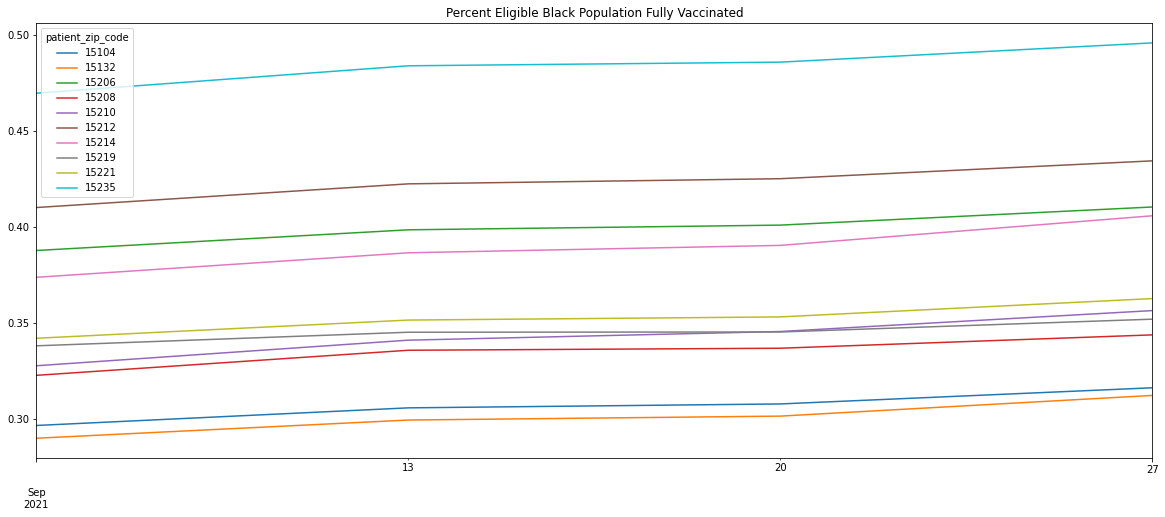

In [5]:
# Limit the dataset to the past month and select zipcodes
from datetime import datetime, timedelta

# start date being 30 days before today
start = datetime.now() - timedelta(days=30)

# filter for zipcodes that start '15'
local_zipcodes = lambda z: z[:2] == '15'

# filter zipcodes in Allegheny County with large proportion Black population
ac_black_zipcodes = ['15104', '15132', '15206', '15208', '15210', '15212', '15214', '15219', '15221', '15235', ]
full_df = full_df[(full_df['zip_code'].isin(ac_black_zipcodes)) & (full_df['date_saved'] > start)]

by_date_zip_pivot = full_df.pivot(index='date_saved', columns='patient_zip_code', values='black_percent_full_covered')
rate_plot = by_date_zip_pivot.plot(
    title='Percent Eligible Black Population Fully Vaccinated',
    xlabel='',
    figsize=(20,8),
)

In [6]:
# get county data for comparison
county_csv = 'https://data.wprdc.org/datastore/dump/7272bc6b-7c7e-4a7f-9ec0-9ee034e6147e'
county_df = pd.read_csv(
    county_csv,
    parse_dates=['date'],
    converters={'partially_covered': n2z, 'fully_covered': n2z},
)

county_df = county_df[(county_df['county'] == 'Allegheny')]
county_df

,date,county,partially_covered,fully_covered
0,2020-12-14,Allegheny,12.0,3.0
7,2020-12-15,Allegheny,7.0,4.0
23,2020-12-16,Allegheny,58.0,7.0
65,2020-12-17,Allegheny,164.0,2.0
119,2020-12-18,Allegheny,1550.0,0.0
...,...,...,...,...
18577,2021-09-18,Allegheny,461.0,536.0
18644,2021-09-19,Allegheny,279.0,356.0
18712,2021-09-20,Allegheny,568.0,627.0
18780,2021-09-21,Allegheny,466.0,528.0


In [7]:
county_df.sort_values('date', inplace=True)

county_df['fully_covered_cumulative'] = county_df['fully_covered'].cumsum()
county_df['partially_covered_cumulative'] = county_df['partially_covered'].cumsum()
county_df['fully_covered_cumulative_%'] = county_df['fully_covered_cumulative'].divide(1221744)
county_df['partially_covered_cumulative_%'] = county_df['partially_covered_cumulative'].divide(1221744)
county_df.head()

,date,county,partially_covered,fully_covered,fully_covered_cumulative,partially_covered_cumulative,fully_covered_cumulative_%,partially_covered_cumulative_%
0,2020-12-14,Allegheny,12.0,3.0,3.0,12.0,0.000002,0.000010
7,2020-12-15,Allegheny,7.0,4.0,7.0,19.0,0.000006,0.000016
23,2020-12-16,Allegheny,58.0,7.0,14.0,77.0,0.000011,0.000063
65,2020-12-17,Allegheny,164.0,2.0,16.0,241.0,0.000013,0.000197
119,2020-12-18,Allegheny,1550.0,0.0,16.0,1791.0,0.000013,0.001466


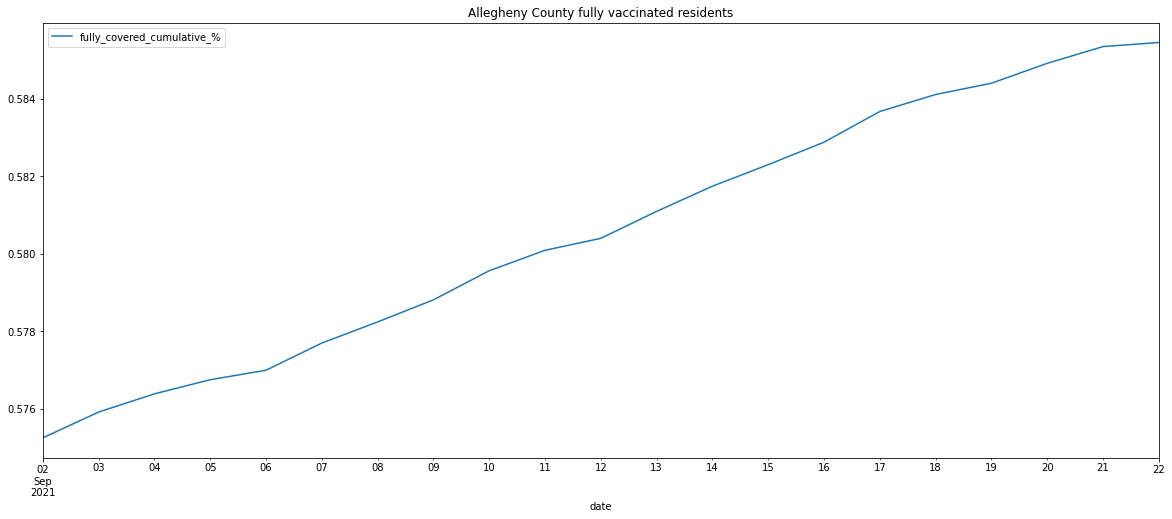

In [8]:
chart = county_df[county_df['date'] > start].plot(
    title='Allegheny County fully vaccinated residents',
    figsize=(20,8),
    x='date',
    y=['fully_covered_cumulative_%']
)

In [9]:
# Combine that with Black vaccination data for comparison
complete_df = pd.merge(full_df, county_df, left_on='date_saved', right_on='date')
complete_df.head()

# todo: plot the zipcode data on same axes as county rate

,patient_zip_code,partially_covered_african_american,partially_covered_asian,partially_covered_native_american,partially_covered_pacific_islander,partially_covered_multiple_other,partially_covered_white,partially_covered_unknown,fully_covered_african_american,fully_covered_asian,...,total_known_percent_fully_covered,black_percent_full_covered,date,county,partially_covered,fully_covered,fully_covered_cumulative,partially_covered_cumulative,fully_covered_cumulative_%,partially_covered_cumulative_%
0,15235,761.0,21.0,0.0,5.0,180.0,980.0,229.0,5431.0,62.0,...,0.565148,0.469777,2021-09-06,Allegheny,187.0,299.0,704939.0,729678.0,0.576994,0.597243
1,15208,284.0,6.0,0.0,0.0,46.0,169.0,83.0,1531.0,31.0,...,0.493412,0.322764,2021-09-06,Allegheny,187.0,299.0,704939.0,729678.0,0.576994,0.597243
2,15212,336.0,24.0,0.0,0.0,119.0,751.0,168.0,2294.0,84.0,...,0.542595,0.410200,2021-09-06,Allegheny,187.0,299.0,704939.0,729678.0,0.576994,0.597243
3,15214,262.0,8.0,0.0,0.0,69.0,285.0,86.0,1551.0,19.0,...,0.540404,0.373843,2021-09-06,Allegheny,187.0,299.0,704939.0,729678.0,0.576994,0.597243
4,15206,510.0,83.0,10.0,5.0,164.0,629.0,369.0,3490.0,310.0,...,0.551722,0.387812,2021-09-06,Allegheny,187.0,299.0,704939.0,729678.0,0.576994,0.597243
